# Sentence Correction using RNN

## Problem Statement:

Given a text message that contains corruputed english language(like social media text messages), we need to convert those 
messages to standard Standard English text.

## Data Overview:

In this Modern World everything has become Digitalized.
Everyone in the World has atleast one Mobile phone or computer.Due to 
evolution, messages to be delivered to people are done via Mobile phones or 
computers.These are fast and easy way for communication. Moreover most of the 
pepole in world now started to use short forms for conveying messages. So 
while performing various NLP based text Problems, the words need better text preprocessing 
to get better performance.So by using various RNN 
techniques we can improve the text or correct the incorrect text to a standard
English so that it can help ML or DL to get better Performance on NLP based 
Models.

The dataset is around 2000 text messages which contains both incorrect and correct sentence.

**Example1:**

-->***Input***:'U wan me to "chop" seat 4 u nt?'

-->***Output:***'Do you want me to reserve seat for you or not?'

**Example2:**
    
-->***Input:***'Yup. U reaching. We order some durian pastry already. U come quick.'

-->***Output:***'Yeap. You reaching? We ordered some Durian pastry already. You come quick.'

## Business Objective and Constraints:

Since this could be used for preprocessing there is not much requirement for very faster results.

In [1]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import tqdm
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
%matplotlib inline

In [2]:
#In the text file the source text(corrupted text) are arranged as 1st line, 4th line, 7th line......etc.
#Same way the target text(standard English) are arranged as 2nd line,5th line,8th line......etc.
#So we need extract them from files,
#And store them in seperate list.
with open('sentencecorrection.txt', encoding="utf8") as f:#reading the files
    source=[]#for storing source text
    target=[]#for storing target text
    for i,j in enumerate(f):#looping over every lines
        if i%3==0:
            source.append(j)#appending the lines which contains source text
        if i%3==1:
            target.append(j)#appending the lines which contains target text

In [3]:
source[:4]#first four source text

['U wan me to "chop" seat 4 u nt?\n',
 'Yup. U reaching. We order some durian pastry already. U come quick.\n',
 'They become more ex oredi... Mine is like 25... So horrible n they did less things than last time...\n',
 "I'm thai. what do u do?\n"]

In [4]:
target[:4]#first four target text

['Do you want me to reserve seat for you or not?\n',
 'Yeap. You reaching? We ordered some Durian pastry already. You come quick.\n',
 'They become more expensive already. Mine is like 25. So horrible and they did less things than I did last time.\n',
 "I'm Thai. What do you do?\n"]

In [30]:
data={'source':source,'target':target}
df=pd.DataFrame(data)#creating DataFrame using the data

In [31]:
df.head(4)#displaying four rows

,source,target
0,"U wan me to ""chop"" seat 4 u nt?\n",Do you want me to reserve seat for you or not?\n
1,Yup. U reaching. We order some durian pastry a...,Yeap. You reaching? We ordered some Durian pas...
2,They become more ex oredi... Mine is like 25.....,They become more expensive already. Mine is li...
3,I'm thai. what do u do?\n,I'm Thai. What do you do?\n


In [7]:
df.to_csv('preprocessed_data.csv')

In [8]:
print("No of data points:")
print(df.shape)#shape if the dataset

No of data points:
(2000, 2)


In [9]:
df.info()#info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  2000 non-null   object
 1   target  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [10]:
df.isnull().sum()#checking for null values

source    0
target    0
dtype: int64

### Words count for each sentence(Source):

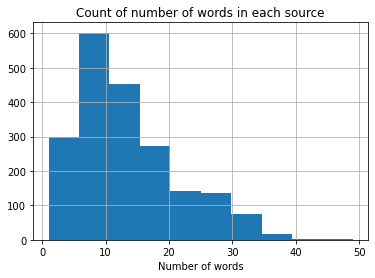

In [11]:
df['source'].str.split().apply(len).hist()#creating a histogram plot of count of words in the whole text data.
plt.title('Count of number of words in each source')
plt.xlabel('Number of words')
plt.show()

### Word count for each sentence(Target):

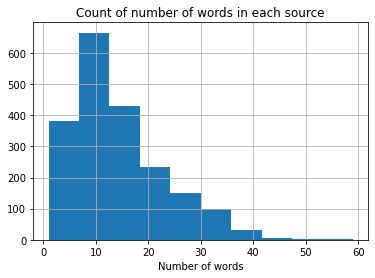

In [12]:
df['target'].str.split().apply(len).hist()#creating a histogram plot of count of words in the whole text data.
plt.title('Count of number of words in each source')
plt.xlabel('Number of words')
plt.show()

**Observation:**

    -->From the above plots we can see the Count of no of number of words in source varies between 0 to 50 and in target the Count of number of words varies between 0 to 60 and their distibution are mostly similar since the target is just correted sentence of the source.

In [13]:
def length(text):#for calculating the length of the sentence
    return len(str(text))

### Characters count for each sentence(Source):

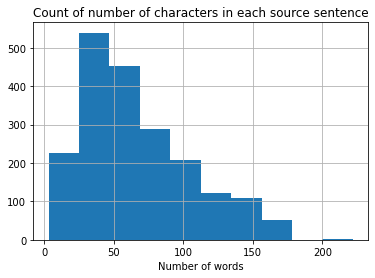

In [14]:
df['source'].apply(length).hist()#creating a histogram plot of count of words in the whole text data.
plt.title('Count of number of characters in each source sentence')
plt.xlabel('Number of words')
plt.show()

### Characters count for each sentence(Target):

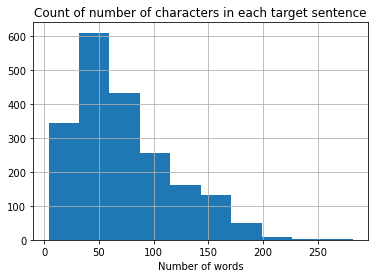

In [15]:
df['target'].apply(length).hist()#creating a histogram plot of count of words in the whole text data.
plt.title('Count of number of characters in each target sentence')
plt.xlabel('Number of words')
plt.show()

**Observation:**

    -->From the above plots we can see that the Count of number of characters in each source sentence varies between 
    0 to 2400 and similar way target sentence varies between 0 to 270.
    

In [16]:
print("No of data points remaining if we remove sentences of length greater than 150: ",len(df[df['source'].apply(length)<150]))
print("No of data points remaining if we remove sentences of length greater than 160: ",len(df[df['source'].apply(length)<160]))
print("No of data points remaining if we remove sentences of length greater than 170: ",len(df[df['source'].apply(length)<170]))
print("No of data points remaining if we remove sentences of length greater than 180: ",len(df[df['source'].apply(length)<180]))

No of data points remaining if we remove sentences of length greater than 150:  1907
No of data points remaining if we remove sentences of length greater than 160:  1977
No of data points remaining if we remove sentences of length greater than 170:  1996
No of data points remaining if we remove sentences of length greater than 180:  1997


In [17]:
print("No of data points remaining if we remove sentences of length greater than 160: ",len(df[df['target'].apply(length)<160]))
print("No of data points remaining if we remove sentences of length greater than 170: ",len(df[df['target'].apply(length)<170]))
print("No of data points remaining if we remove sentences of length greater than 180: ",len(df[df['target'].apply(length)<180]))
print("No of data points remaining if we remove sentences of length greater than 190: ",len(df[df['target'].apply(length)<190]))
print("No of data points remaining if we remove sentences of length greater than 200: ",len(df[df['target'].apply(length)<200]))
print("No of data points remaining if we remove sentences of length greater than 210: ",len(df[df['target'].apply(length)<210]))

No of data points remaining if we remove sentences of length greater than 160:  1885
No of data points remaining if we remove sentences of length greater than 170:  1937
No of data points remaining if we remove sentences of length greater than 180:  1958
No of data points remaining if we remove sentences of length greater than 190:  1978
No of data points remaining if we remove sentences of length greater than 200:  1990
No of data points remaining if we remove sentences of length greater than 210:  1995


### Frequently occuring words in Source:

In [18]:
vect=CountVectorizer()#in the presence of stop words
output=vect.fit_transform(df['source'])
features=vect.get_feature_names()#here we are getting the unique feature names

#https://stackoverflow.com/questions/27488446/how-do-i-get-word-frequency-in-a-corpus-using-scikit-learn-countvectorizer
count=output.toarray().sum(axis=0)#here we are getting the count of unique words

df=pd.DataFrame(count,features)#Loading the feature and count to the DataFrame
df=df.sort_values(by=0,ascending=False)#Sorting the DataFrame to get the most occurances
df=df[:40]#Top 40 words with most word count
df

,0
to,505
me,327
at,258
my,256
go,251
so,247
can,244
the,193
you,191
not,182


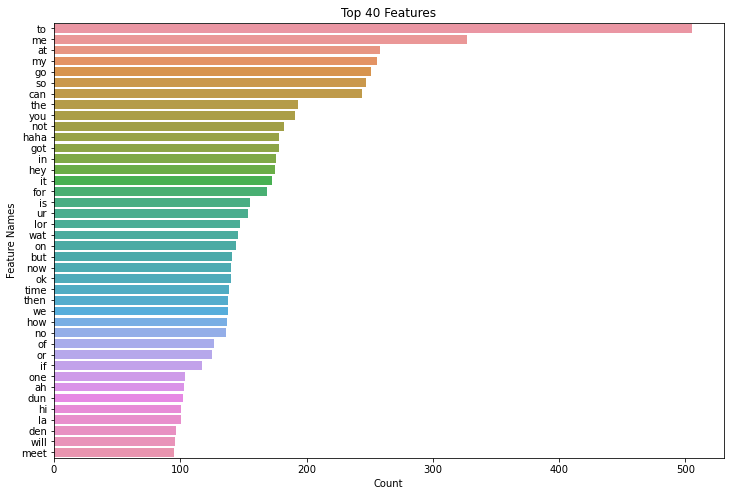

In [19]:
x=df.index#getting only the top 40 feature names
y=[df[0][i] for i in range(len(df))]#getting the count of top 40 feature names
plt.figure(figsize=(12,8))
sns.barplot(x=y,y=x)
plt.title('Top 40 Features')
plt.xlabel('Count')
plt.ylabel('Feature Names')
plt.show()

### Frequently occuring words in Target:

In [23]:
vect=CountVectorizer()#in the presence of stop words
output=vect.fit_transform(df['target'])
features=vect.get_feature_names()#here we are getting the unique feature names

#https://stackoverflow.com/questions/27488446/how-do-i-get-word-frequency-in-a-corpus-using-scikit-learn-countvectorizer
count=output.toarray().sum(axis=0)#here we are getting the count of unique words

df=pd.DataFrame(count,features)#Loading the feature and count to the DataFrame
df=df.sort_values(by=0,ascending=False)#Sorting the DataFrame to get the most occurances
df=df[:40]#Top 40 words with most word count
df

,0
you,1469
to,850
the,498
are,412
is,334
it,324
and,310
me,302
for,297
can,294


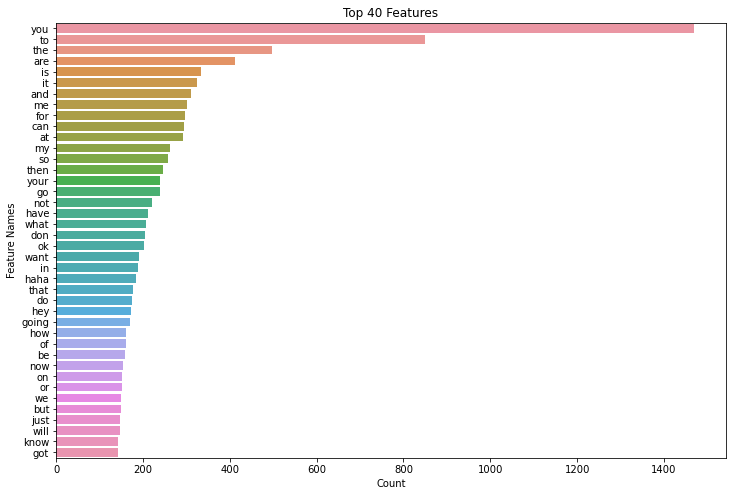

In [24]:
x=df.index#getting only the top 40 feature names
y=[df[0][i] for i in range(len(df))]#getting the count of top 40 feature names
plt.figure(figsize=(12,8))
sns.barplot(x=y,y=x)
plt.title('Top 40 Features')
plt.xlabel('Count')
plt.ylabel('Feature Names')
plt.show()

**Observation:**

    By using the Count Vectorizer, we are getting the Top 40 Features that occur more frequently in the source and target.
    The above plots shows the words that are frequently occuring in the whole corpus.

### Rare words in Source:

In [28]:
#here we are using TfidfVectorizer and fitting to source corpus and finding the rare words
from nltk.corpus import stopwords
vect=TfidfVectorizer()
output=vect.fit_transform(df['source'])
features=vect.get_feature_names()
idf_values=vect.idf_
df=pd.DataFrame(idf_values,features)
df=df.sort_values(by=0,ascending=False)
df=df[:10]
df

,0
000pes,7.908255
matthew,7.908255
marketin,7.908255
marshmallow,7.908255
match,7.908255
math,7.908255
maths,7.908255
matric,7.908255
matriculation,7.908255
maxy,7.908255


In [32]:
#here we are using TfidfVectorizer and fitting to target corpus and finding the rare words
from nltk.corpus import stopwords
vect=TfidfVectorizer()
output=vect.fit_transform(df['target'])
features=vect.get_feature_names()
idf_values=vect.idf_
df=pd.DataFrame(idf_values,features)
df=df.sort_values(by=0,ascending=False)
df=df[:10]
df

,0
00,7.908255
malayu,7.908255
materials,7.908255
match,7.908255
mass,7.908255
marshmallow,7.908255
marketing,7.908255
marine,7.908255
marina,7.908255
march,7.908255


**Observation:**

    By using idf_values we could get the rare words in the whole corupus.Similarly we are getting the rare words for 
    both source and text.